# Real Estate Regression Analysis

Please fill out:
* Student name: Melody Bass
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [998]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [943]:
# Data Import
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [944]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [945]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [946]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

In [947]:
# Columns to be dropped
dropped_columns = ['id', 'date', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'yr_built', 'lat', 'long']

In [948]:
df = df.drop(dropped_columns, axis=1)

In [949]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [950]:
#Keep houses 100,000 - 800,000
#df = df.loc[(df['price'] >= 100000) & (df['price'] <= 800000)]
#df.head()

In [951]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   waterfront    19221 non-null  object 
 7   view          21534 non-null  object 
 8   condition     21597 non-null  object 
 9   grade         21597 non-null  object 
 10  sqft_above    21597 non-null  int64  
 11  yr_renovated  17755 non-null  float64
 12  zipcode       21597 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 2.1+ MB


In [952]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [953]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df['sqft_basement'].astype('int')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int64

In [954]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [955]:
df['has_basement'] = df['sqft_basement'] > 0
df['has_basement'] = df['has_basement'].astype(int)

In [956]:
df['has_basement'].value_counts()

0    13110
1     8487
Name: has_basement, dtype: int64

In [957]:
df = df.drop('sqft_basement', axis=1)

In [958]:
# 30 years as cutoff for renovation
df['renovated'] = (df['yr_renovated'] > 1985).astype(int)

In [959]:
df.renovated.value_counts()

0    21016
1      581
Name: renovated, dtype: int64

In [960]:
df = df.drop('yr_renovated', axis=1)

In [961]:
df.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
view              63
condition          0
grade              0
sqft_above         0
zipcode            0
has_basement       0
renovated          0
dtype: int64

In [962]:
df = df.fillna(0)

In [963]:
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqft_above      0
zipcode         0
has_basement    0
renovated       0
dtype: int64

In [964]:
# get the median of bedrooms without 0 and 33 
med_bedroom = df.loc[(df['bedrooms'] != 33) | (df['bedrooms'] != 0), 'bedrooms'].median()


In [965]:
#Replace erroneous values with median bedrooms
df['bedrooms'] = np.where((df['bedrooms'] == 33) | (df['bedrooms'] == 0), round(med_bedroom), df['bedrooms'])

In [966]:
df.bedrooms.value_counts()

3.0     9825
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      196
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
Name: bedrooms, dtype: int64

for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

In [967]:
df['waterfront'] = df['waterfront'].replace(('YES', 'NO'), (1, 0))
df['view'] = df['view'].replace(('NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT')
                                , (0, 1, 2, 3, 4))
df['condition'] = df['condition'].replace(('Poor', 'Fair', 'Average', 'Good', 'Very Good')
                                , (0, 1, 2, 3, 4))
df['grade'] = df['grade'].replace(('3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'
                                   , '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion')
                                , (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [968]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  float64
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   waterfront    21597 non-null  int64  
 7   view          21597 non-null  int64  
 8   condition     21597 non-null  int64  
 9   grade         21597 non-null  int64  
 10  sqft_above    21597 non-null  int64  
 11  zipcode       21597 non-null  int64  
 12  has_basement  21597 non-null  int64  
 13  renovated     21597 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.3 MB


In [969]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [970]:
df.waterfront.value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [971]:
df.view.value_counts()

0    19485
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [972]:
df.condition.value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

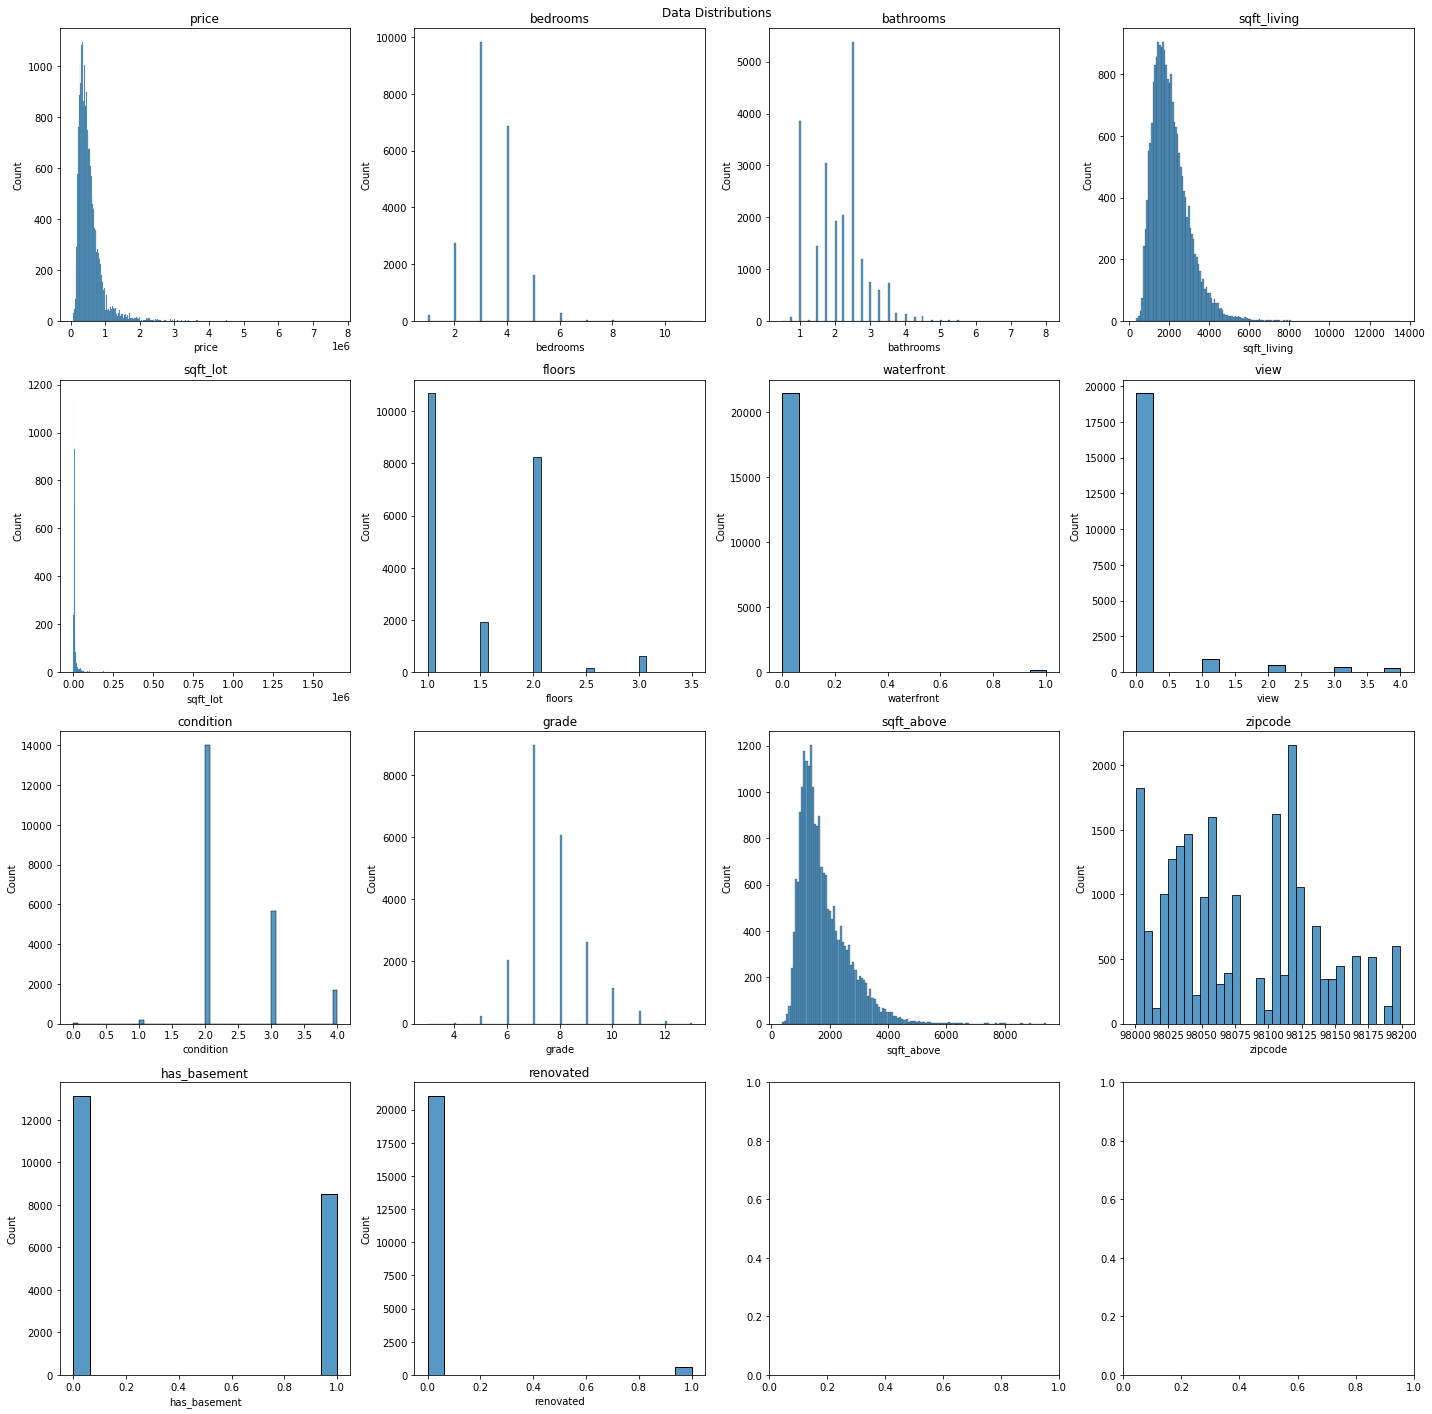

In [973]:
# Looking at the distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

In [974]:
# convert to category type
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode','renovated','has_basement']
cont = ['sqft_living', 'sqft_lot', 'sqft_above']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')   

In [975]:
df = pd.get_dummies(df, drop_first=True)

subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

df.head()

,price,sqft_living,sqft_lot,sqft_above,bedrooms_20,bedrooms_30,bedrooms_40,bedrooms_50,bedrooms_60,bedrooms_70,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,221900.0,1180,5650,1180,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,2170,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,770,10000,770,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,1680,8080,1680,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [976]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'bedrooms_20',
 'bedrooms_30',
 'bedrooms_40',
 'bedrooms_50',
 'bedrooms_60',
 'bedrooms_70',
 'bedrooms_80',
 'bedrooms_90',
 'bedrooms_100',
 'bedrooms_110',
 'bathrooms_075',
 'bathrooms_10',
 'bathrooms_125',
 'bathrooms_15',
 'bathrooms_175',
 'bathrooms_20',
 'bathrooms_225',
 'bathrooms_25',
 'bathrooms_275',
 'bathrooms_30',
 'bathrooms_325',
 'bathrooms_35',
 'bathrooms_375',
 'bathrooms_40',
 'bathrooms_425',
 'bathrooms_45',
 'bathrooms_475',
 'bathrooms_50',
 'bathrooms_525',
 'bathrooms_55',
 'bathrooms_575',
 'bathrooms_60',
 'bathrooms_625',
 'bathrooms_65',
 'bathrooms_675',
 'bathrooms_75',
 'bathrooms_775',
 'bathrooms_80',
 'floors_15',
 'floors_20',
 'floors_25',
 'floors_30',
 'floors_35',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 

## Pre-Modeling Linearity Check

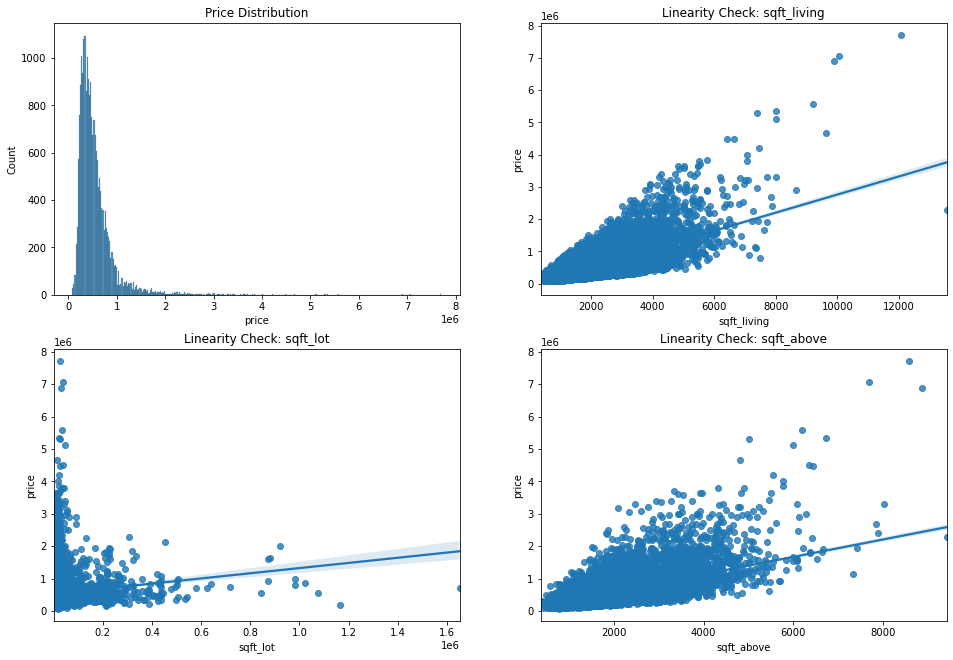

In [977]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(df['price'], ax=axes[0][0]).set_title('Price Distribution')

# why a reg plot over a scatter plot?
for feat, ax in zip(cont, axes.flatten()[1:]): 
  sns.regplot(feat,'price', data=df, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

## Pre-Modeling Multicollinearity Check

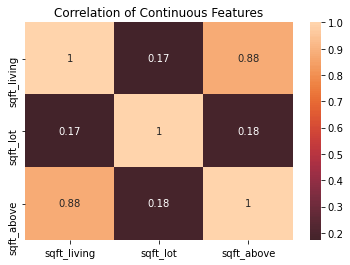

In [978]:
corr = df[cont].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous Features');

In [979]:
#abs(features.corr()) > 0.8

fig, axes = plt.subplots(figsize=(15,15))
for i in range(len(categorical)):
    col = categorical
    
    sns.boxplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col + ' box plot')
    fig.suptitle('Feature vs Price')
    fig.tight_layout()           

fig, axes = plt.subplots(figsize=(15,15),ncols=2,nrows=4)
for i in range(len(categorical)):
    col = categorical[i]
    y = i%2
    x = i//2
    ax = axes[x,y]
    
    sns.boxplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col + ' box plot')
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

## Modeling

### Train Test Split and Model Function

In [980]:
train, test = train_test_split(df)
train.head()

,price,sqft_living,sqft_lot,sqft_above,bedrooms_20,bedrooms_30,bedrooms_40,bedrooms_50,bedrooms_60,bedrooms_70,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
5208,368000.0,2720,7350,2720,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4346,659950.0,1610,1246,1080,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18790,520000.0,1850,10855,1370,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5748,387000.0,1230,1280,960,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1501,612000.0,3840,14040,2460,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [981]:
def model(train, test):
  
  target = 'price'
  x_cols = list(train.columns)
  x_cols.remove('price')

  predictors = '+'.join(x_cols)
  formula = target + '~' + predictors
  model = ols(formula=formula, data=train).fit()

  # RMSE
  train_err = (mean_squared_error(train['price'], model.predict(train)))**0.5
  test_err = (mean_squared_error(test['price'], model.predict(test)))**0.5

  print("Train RMSE: ", train_err)
  print("Test RMSE: ", test_err, '\n')

  return model

In [982]:
model(train, test).summary()

Train RMSE:  145011.9597251294
Test RMSE:  153274.14350581812 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     655.5
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:20:18   Log-Likelihood:            -2.1548e+05
No. Observations:               16197   AIC:                         4.312e+05
Df Residuals:                   16061   BIC:                         4.323e+05
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        6.85e+04   1.68e+05      0.408      0.683    -2.6e+05    3.97e+05
sqft_living      122.5996      5.326     23.018      0.000     112.160     133.040
sqft_lot           0.1691      0.030      5.658      0.000       0.111       0.228
sqft_above        37.5314      5.965      6.292      0.000      25.840      49.223
bedrooms_20    -5048.7160   1.26e+04     -0.400      0.689   -2.98e+04    1.97e+04
bedrooms_30     7036.6475   1.26e+04      0.557      0.578   -1.77e+04    3.18e+04
bedrooms_40    -4755.1444   1.29e+04     -0.367      0.713   -3.01e+04    2.06e+04
bedrooms_50    -2.557e+04   1.37e+04     -1.871      0.061   -5.24e+04    1214.878
bedrooms_60    -5.404e+04   1.68e+04     -3.208      0.001   -8.71e+04    -2.1e+04
bedrooms_70    -1.781e+05   3.02e+04     -5.895      0.000   -2.37e+05   -1.19e+05
bedrooms_80    -1.225e+05   4.93e+04     -2.483      0.013   -2.19e+05   -2.58e+04
bedrooms_90    -1.362e+05   7.54e+04     -1.807      0.071   -2.84e+05    1.16e+04
bedrooms_100   -3.841e+05   1.07e+05     -3.580      0.000   -5.94e+05   -1.74e+05
bedrooms_110   -9.371e+04   1.47e+05     -0.638      0.523   -3.82e+05    1.94e+05
bathrooms_075  -2.734e+04   7.59e+04     -0.360      0.719   -1.76e+05    1.21e+05
bathrooms_10    2.977e+04   7.31e+04      0.407      0.684   -1.13e+05    1.73e+05
bathrooms_125  -5.935e+04   9.16e+04     -0.648      0.517   -2.39e+05     1.2e+05
bathrooms_15    2.087e+04   7.32e+04      0.285      0.776   -1.23e+05    1.64e+05
bathrooms_175   1.997e+04   7.31e+04      0.273      0.785   -1.23e+05    1.63e+05
bathrooms_20    1.771e+04   7.32e+04      0.242      0.809   -1.26e+05    1.61e+05
bathrooms_225   4.176e+04   7.32e+04      0.570      0.568   -1.02e+05    1.85e+05
bathrooms_25    3.031e+04   7.32e+04      0.414      0.679   -1.13e+05    1.74e+05
bathrooms_275     2.7e+04   7.33e+04      0.368      0.713   -1.17e+05    1.71e+05
bathrooms_30    4.715e+04   7.34e+04      0.642      0.521   -9.67e+04    1.91e+05
bathrooms_325   9.208e+04   7.35e+04      1.252      0.210    -5.2e+04    2.36e+05
bathrooms_35    4.927e+04   7.35e+04      0.671      0.503   -9.48e+04    1.93e+05
bathrooms_375   1.337e+05   7.44e+04      1.797      0.072   -1.21e+04     2.8e+05
bathrooms_40    1.037e+05   7.48e+04      1.386      0.166   -4.29e+04     2.5e+05
bathrooms_425   2.164e+05   7.57e+04      2.860      0.004    6.81e+04    3.65e+05
bathrooms_45    1.664e+05   7.52e+04      2.213      0.027     1.9e+04    3.14e+05
bathrooms_475   4.304e+05   8.23e+04      5.230      0.000    2.69e+05    5.92e+05
bathrooms_50    2.712e+05   8.18e+04      3.317      0.001    1.11e+05    4.32e+05
bathrooms_525   1.424e+05   8.92e+04      1.596      0.110   -3.25e+04    3.17e+05
bathrooms_55     3.28e+05   8.97e+04      3.656      0.000    1.52e+05    5.04e+05
bathrooms_57

### Remove Insignificant Features

In [983]:
model1 = model(train, test).summary()
p_table = model1.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
sig = list(p_table[p_table['P>|t|'] < 0.05].index)
print("Total # features: ", len(p_table))
print("Total significant features", len(sig))
p_table.drop('Intercept').head()

Train RMSE:  145011.9597251294
Test RMSE:  153274.14350581812 

Total # features:  137
Total significant features 89


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
sqft_living,122.5996,5.326,23.018,0.000,112.160,133.040
sqft_lot,0.1691,0.030,5.658,0.000,0.111,0.228
sqft_above,37.5314,5.965,6.292,0.000,25.840,49.223
bedrooms_20,-5048.7160,1.26e+04,-0.400,0.689,-2.98e+04,1.97e+04
bedrooms_30,7036.6475,1.26e+04,0.557,0.578,-1.77e+04,3.18e+04


In [984]:
# culling insignificant features
# sig.remove('Intercept')
train2, test2 = train[sig+['price']], test[sig+['price']]

In [985]:
train2.shape

(16197, 90)

In [986]:
model2 = model(train2, test2)
model2.summary()

Train RMSE:  154438.227422492
Test RMSE:  163558.125496901 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     867.5
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:20:19   Log-Likelihood:            -2.1650e+05
No. Observations:               16197   AIC:                         4.332e+05
Df Residuals:                   16108   BIC:                         4.339e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.704e+05   1.33e+04    -12.857      0.000   -1.96e+05   -1.44e+05
sqft_living      137.4991      5.280     26.042      0.000     127.150     147.848
sqft_lot           0.2245      0.031      7.275      0.000       0.164       0.285
sqft_above        92.3649      6.066     15.226      0.000      80.475     104.255
bedrooms_60    -7.751e+04   1.14e+04     -6.805      0.000   -9.98e+04   -5.52e+04
bedrooms_70    -1.866e+05   2.86e+04     -6.518      0.000   -2.43e+05    -1.3e+05
bedrooms_80    -1.717e+05      5e+04     -3.432      0.001    -2.7e+05   -7.36e+04
bedrooms_100   -3.871e+05    1.1e+05     -3.521      0.000   -6.03e+05   -1.72e+05
bathrooms_425   2.092e+05      2e+04     10.461      0.000     1.7e+05    2.48e+05
bathrooms_45    1.391e+05   1.76e+04      7.898      0.000    1.05e+05    1.74e+05
bathrooms_475    4.15e+05   3.95e+04     10.515      0.000    3.38e+05    4.92e+05
bathrooms_50    2.559e+05   3.84e+04      6.659      0.000    1.81e+05    3.31e+05
bathrooms_55    2.714e+05   5.47e+04      4.967      0.000    1.64e+05    3.79e+05
bathrooms_575   1.496e+05   9.38e+04      1.594      0.111   -3.43e+04    3.33e+05
bathrooms_60    1.072e+06   8.04e+04     13.335      0.000    9.15e+05    1.23e+06
bathrooms_625  -2.622e-08   3.27e-09     -8.029      0.000   -3.26e-08   -1.98e-08
bathrooms_775    1.76e+06   1.71e+05     10.301      0.000    1.43e+06     2.1e+06
bathrooms_80     8.57e+05   1.18e+05      7.255      0.000    6.25e+05    1.09e+06
floors_15      -3.089e+04   4788.109     -6.451      0.000   -4.03e+04   -2.15e+04
floors_20      -3.033e+04   3644.319     -8.323      0.000   -3.75e+04   -2.32e+04
floors_30       -7.16e+04   8351.344     -8.573      0.000    -8.8e+04   -5.52e+04
waterfront_1      6.6e+05   1.83e+04     36.051      0.000    6.24e+05    6.96e+05
view_1          9.625e+04   6186.450     15.559      0.000    8.41e+04    1.08e+05
view_2          1.927e+05   8314.508     23.180      0.000    1.76e+05    2.09e+05
view_3          9.021e+04   1.02e+04      8.833      0.000    7.02e+04     1.1e+05
view_4          3.294e+05   1.26e+04     26.181      0.000    3.05e+05    3.54e+05
condition_2     3.069e+04   1.28e+04      2.400      0.016    5622.365    5.58e+04
condition_3     4.397e+04   1.29e+04      3.410      0.001    1.87e+04    6.92e+04
condition_4     9.225e+04   1.34e+04      6.879      0.000     6.6e+04    1.19e+05
grade_12        5.798e+05   2.13e+04     27.246      0.000    5.38e+05    6.22e+05
grade_13        1.661e+06   6.65e+04     24.970      0.000    1.53e+06    1.79e+06
zipcode_98004   8.258e+05   1.08e+04     76.502      0.000    8.05e+05    8.47e+05
zipcode_98005   3.444e+05   1.42e+04     24.312      0.000    3.17e+05    3.72e+05
zipcode_98006    3.06e+05   8851.104     34.575      0.000    2.89e+05    3.23e+05
zipcode_9800

In [987]:
model2 = model(train2, test2).summary()
p_table = model2.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
sig = list(p_table[p_table['P>|t|'] < 0.05].index)
sig.remove('Intercept')
print("Total # features: ", len(p_table))
print("Total significant features", len(sig))
p_table.head()

Train RMSE:  154438.227422492
Test RMSE:  163558.125496901 

Total # features:  90
Total significant features 87


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-1.704e+05,1.33e+04,-12.857,0.0,-1.96e+05,-1.44e+05
sqft_living,137.4991,5.280,26.042,0.0,127.150,147.848
sqft_lot,0.2245,0.031,7.275,0.0,0.164,0.285
sqft_above,92.3649,6.066,15.226,0.0,80.475,104.255
bedrooms_60,-7.751e+04,1.14e+04,-6.805,0.0,-9.98e+04,-5.52e+04


In [988]:
# culling insignificant features
train3, test3 = train[sig+['price']], test[sig+['price']]

In [989]:
model3 = model(train3, test3)
model3.summary()

Train RMSE:  154451.65293338508
Test RMSE:  163582.2504485513 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     887.6
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:20:20   Log-Likelihood:            -2.1650e+05
No. Observations:               16197   AIC:                         4.332e+05
Df Residuals:                   16110   BIC:                         4.338e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.711e+05   1.32e+04    -12.942      0.000   -1.97e+05   -1.45e+05
sqft_living     135.5756      3.158     42.926      0.000     129.385     141.766
sqft_lot          0.2255      0.031      7.307      0.000       0.165       0.286
sqft_above       94.5905      3.911     24.189      0.000      86.925     102.256
bedrooms_60   -7.745e+04   1.14e+04     -6.805      0.000   -9.98e+04   -5.51e+04
bedrooms_70   -1.809e+05   2.84e+04     -6.363      0.000   -2.37e+05   -1.25e+05
bedrooms_80   -1.712e+05      5e+04     -3.423      0.001   -2.69e+05   -7.31e+04
bedrooms_100  -3.858e+05    1.1e+05     -3.511      0.000   -6.01e+05    -1.7e+05
bathrooms_425  2.084e+05      2e+04     10.429      0.000    1.69e+05    2.48e+05
bathrooms_45   1.386e+05   1.76e+04      7.868      0.000    1.04e+05    1.73e+05
bathrooms_475  4.129e+05   3.94e+04     10.472      0.000    3.36e+05     4.9e+05
bathrooms_50   2.539e+05   3.84e+04      6.612      0.000    1.79e+05    3.29e+05
bathrooms_55   2.636e+05   5.44e+04      4.842      0.000    1.57e+05     3.7e+05
bathrooms_60   1.071e+06   8.04e+04     13.329      0.000    9.14e+05    1.23e+06
bathrooms_625  1.355e-08   1.95e-09      6.943      0.000    9.72e-09    1.74e-08
bathrooms_775  1.728e+06    1.7e+05     10.178      0.000     1.4e+06    2.06e+06
bathrooms_80   8.423e+05   1.17e+05      7.178      0.000    6.12e+05    1.07e+06
floors_15     -3.085e+04   4787.137     -6.445      0.000   -4.02e+04   -2.15e+04
floors_20     -3.039e+04   3642.215     -8.345      0.000   -3.75e+04   -2.33e+04
floors_30     -7.131e+04   8335.865     -8.554      0.000   -8.76e+04    -5.5e+04
waterfront_1     6.6e+05   1.83e+04     36.055      0.000    6.24e+05    6.96e+05
view_1          9.61e+04   6185.895     15.535      0.000     8.4e+04    1.08e+05
view_2         1.927e+05   8310.610     23.185      0.000    1.76e+05    2.09e+05
view_3         9.062e+04   1.02e+04      8.877      0.000    7.06e+04    1.11e+05
view_4         3.293e+05   1.26e+04     26.196      0.000    3.05e+05    3.54e+05
condition_2    3.056e+04   1.28e+04      2.390      0.017    5498.050    5.56e+04
condition_3    4.387e+04   1.29e+04      3.403      0.001    1.86e+04    6.91e+04
condition_4    9.223e+04   1.34e+04      6.878      0.000    6.59e+04    1.19e+05
grade_12       5.828e+05   2.12e+04     27.485      0.000    5.41e+05    6.24e+05
grade_13       1.688e+06   6.44e+04     26.194      0.000    1.56e+06    1.81e+06
zipcode_98004  8.255e+05   1.08e+04     76.486      0.000    8.04e+05    8.47e+05
zipcode_98005  3.442e+05   1.42e+04     24.296      0.000    3.16e+05    3.72e+05
zipcode_98006  3.059e+05   8850.285     34.564      0.000    2.89e+05    3.23e+05
zipcode_98007  2.854e+05   1.54e+04     18.497      0.000    2.55e+05    3.16e+05
zipcode_98008  2.683e+05   1.11e+04     24.265   

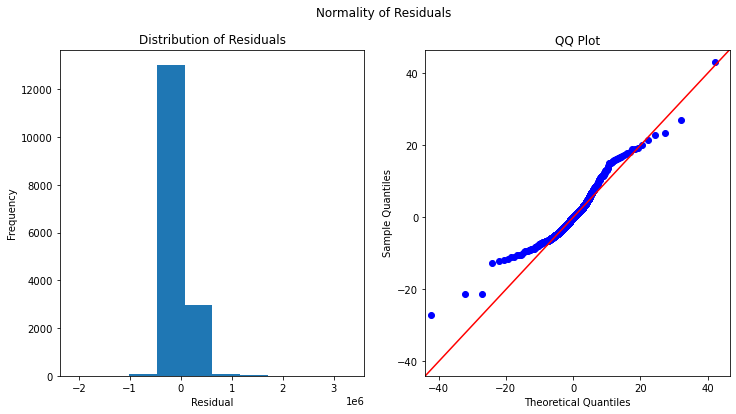

In [990]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.hist(model3.resid)
ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

sm.qqplot(model3.resid, stats.t, fit=True, line="45", ax=ax1)
ax1.set(title='QQ Plot')

fig.suptitle('Normality of Residuals')

fig.show()

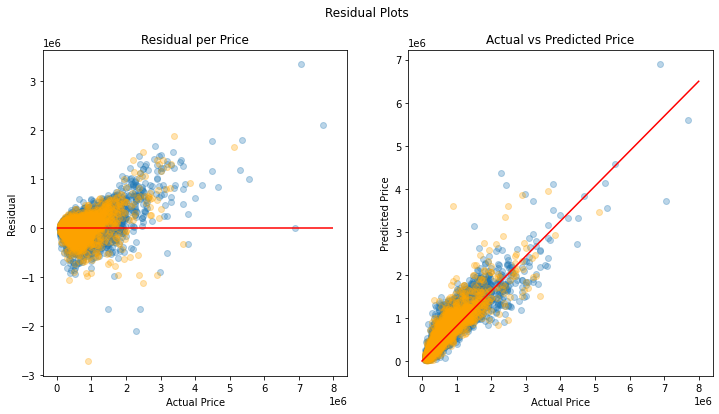

In [991]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(train3['price'], model3.resid, alpha=0.3)
axes[0].scatter(test3['price'], (test3['price']-model3.predict(test3)), color='orange', alpha=0.3)
axes[0].set(xlabel='Actual Price', ylabel='Residual', title='Residual per Price')
axes[0].hlines(0, xmin=0, xmax=8000000, colors='red')

axes[1].scatter(train3['price'], model3.predict(train3), alpha=0.3)
axes[1].scatter(test3['price'], model3.predict(test3), color='orange', alpha=0.3)
axes[1].plot([0, 8000000], [0, 6500000], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
fig.show()

### Log Transformation

In [992]:
df['log_price'] = df['price'].copy()
df['log_price'] = df['log_price'].map(lambda x: np.log(x))

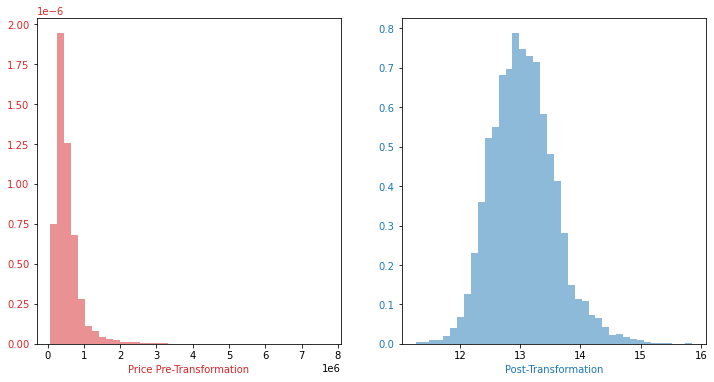

In [993]:
#Visualize change in distribution from log transformation

newfig = plt.figure(num=2, figsize = (12,6))
ax_pre = newfig.add_subplot(1,2,1)
ax_post = newfig.add_subplot(1,2,2)
    
color = 'tab:red'
ax_pre.set_xlabel(('Price Pre-Transformation'),  color=color)
ax_pre.hist(df['price'], bins=40, density = True, alpha = 0.5, color=color)
ax_pre.tick_params(axis='y', labelcolor=color)
    
color2 = 'tab:blue'
ax_post.set_xlabel(('Post-Transformation'), color=color2)
ax_post.hist(df['log_price'], bins=40, density = True,  alpha = 0.5, color=color2)
ax_post.tick_params(axis='y', labelcolor=color2)

plt.show()

In [994]:
df = df.drop('price', axis=1)
df.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms_20', 'bedrooms_30',
       'bedrooms_40', 'bedrooms_50', 'bedrooms_60', 'bedrooms_70',
       'bedrooms_80',
       ...
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199', 'has_basement_1',
       'renovated_1', 'log_price'],
      dtype='object', length=137)

### Update Modeling Function for Log Transformation

In [999]:
def model(train, test):
  
  target = 'log_price'
  x_cols = list(train.columns)
  x_cols.remove('log_price')

  predictors = '+'.join(x_cols)
  formula = target + '~' + predictors
  model = ols(formula=formula, data=train).fit()

  # RMSE before log transformation
  train_err = (mean_squared_error(train['log_price'], model.predict(train)))**0.5
  test_err = (mean_squared_error(test['log_price'], model.predict(test)))**0.5
  
  # RMSE after rev log
  y_hat_train = np.exp(linreg.predict(X_train))
  y_hat_test = np.exp(linreg.predict(X_test))

  train_mse = mean_squared_error(np.exp(y_train), y_hat_train)
  test_mse = mean_squared_error(np.exp(y_test), y_hat_test)

  print("Train RMSE: ", train_mse**0.5)
  print("Test RMSE: ", test_mse**0.5)

  return model

In [1000]:
train4, test4 = train_test_split(df)

In [1001]:
model4 = model(train4, test4)
model4.summary()

NameError: name 'linreg' is not defined

### Scale the data

In [ ]:
X_train = train3.drop('price', axis=1)
X_test = test3.drop('price', axis=1)

standardizer = StandardScaler()

train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)

train_scaled['price'] = train3.price.values
test_scaled['price'] = test3.price.values

In [ ]:
train_scaled.tail()

In [ ]:
scaled_model = model(train_scaled, test_scaled)
scaled_model.summary()

Exploring PSF

In [ ]:
psf_df = df.copy()

In [ ]:
psf_df['psf'] = psf_df['price'] / psf_df['sqft_above']
psf_df.head()

In [ ]:
plt.hist(psf_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency')